In [1]:
# Bhagawat Chapagain
# CS513 HW5 CART
# CART tree based on Wisconsin cancer diagnosis data 
# 20014827
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
# Load dataset
df = pd.read_csv('./breast-cancer-wisconsin.csv')

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df.info()

# remember from the last homework that only F6 col had ?=nan values
# Convert column 'F6' to numeric, coercing any non-numeric values (like "?" or "NA") to NaN
df['F6'] = pd.to_numeric(df['F6'], errors='coerce')

# Calculate the mean of 'F6', excluding NaN values
mean_f6 = df['F6'].mean()

df['F6'].fillna(mean_f6, inplace=True)


Empty DataFrame
Columns: [Sample, F1, F2, F3, F4, F5, F6, F7, F8, F9, Class]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sample  699 non-null    int64 
 1   F1      699 non-null    int64 
 2   F2      699 non-null    int64 
 3   F3      699 non-null    int64 
 4   F4      699 non-null    int64 
 5   F5      699 non-null    int64 
 6   F6      699 non-null    object
 7   F7      699 non-null    int64 
 8   F8      699 non-null    int64 
 9   F9      699 non-null    int64 
 10  Class   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


/tmp/ipykernel_7221/3786777586.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['F6'].fillna(mean_f6, inplace=True)


In [3]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sample  699 non-null    int64  
 1   F1      699 non-null    int64  
 2   F2      699 non-null    int64  
 3   F3      699 non-null    int64  
 4   F4      699 non-null    int64  
 5   F5      699 non-null    int64  
 6   F6      699 non-null    float64
 7   F7      699 non-null    int64  
 8   F8      699 non-null    int64  
 9   F9      699 non-null    int64  
 10  Class   699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Empty DataFrame


Class
2    458
4    241
Name: count, dtype: int64
Class
2    65.522175
4    34.477825
Name: count, dtype: float64


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


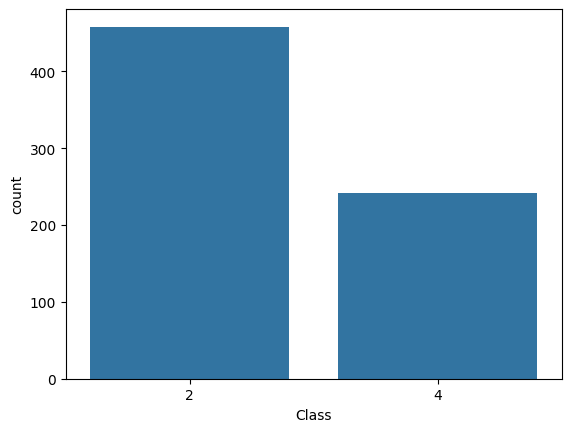

In [4]:

# Separate features and target
attr = df.drop(columns=['Sample', 'Class'])
target = df['Class']

# df_obj= pd.get_dummies(df_obj)
df = pd.get_dummies(df, drop_first=True)
print(target.value_counts())
print((target.value_counts()/ target.value_counts().sum()) * 100)

sns.countplot(data=df, x='Class')
df.head()

In [5]:
# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=6)

In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [7]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

[[131   6]
 [  7  66]]
              precision    recall  f1-score   support

           2       0.95      0.96      0.95       137
           4       0.92      0.90      0.91        73

    accuracy                           0.94       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.94      0.94      0.94       210



In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);